## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('bmh')

from time import sleep
from datetime import datetime


from scipy import sparse
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

### Reading in CSV
---

In [2]:
df = pd.read_csv('../data/Combined_Final_Data/recommender_data.csv')
print(df.shape)
df.head(2)

(799, 36)


,team,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,...,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot,league
0,New England Patriots,2018,16,11,5,0.688,27.2500,20.3125,5.2,-1.8,...,22.9375,112.6875,0.4375,62.625,359.1250,5.7,0.6250,1.1250,1.75,NFL
1,Miami Dolphins,2018,16,7,9,0.438,19.9375,27.0625,-8.8,-1.7,...,30.3125,145.3125,1.0625,64.000,391.0625,6.1,0.4375,1.3125,1.75,NFL


In [3]:
df.tail(2)

,team,year,games_played,wins,loss,win_pct,off_pts,def_pts,SRS,SOS,...,opp_rush_att,opp_rush_yds,opp_rush_TD,opp_plays,opp_yds,opp_yds_play,opp_Fum,opp_Int,opp_TO_Tot,league
797,Idaho,2014,11,1,10,0.091,25.0,37.3,-19.67,-7.21,...,43.9,245.9,2.9,66.8,462.1,6.9,0.8,0.7,1.5,College
798,Georgia State,2014,12,1,11,0.083,22.7,43.3,-20.41,-4.50,...,48.5,303.4,3.4,75.7,497.1,6.6,0.4,0.3,0.7,College


In [4]:
df.drop(columns=['wins','loss'], inplace=True)

## K-Means Clustering

In [5]:
df2 = df.copy()

In [6]:
X = df.iloc[:,3:33]
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)

In [7]:
km = KMeans(n_clusters=19, random_state= 1906)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=19, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1906, tol=0.0001, verbose=0)

In [8]:
km.labels_

array([12, 14,  6,  6, 12, 14, 14, 14, 12, 14, 12,  6, 14, 12, 14,  6, 12,
       14,  6, 14, 12, 12, 14,  6, 12, 14, 14, 14, 12, 12,  6,  6, 12, 12,
        6,  6, 12, 12,  6,  6, 12, 12,  6,  6, 12, 12,  6,  6, 12, 12,  6,
        6, 12, 14, 14,  6, 12, 12, 12, 14, 12, 12,  6,  6, 12, 14, 11,  6,
       12, 14, 12,  6,  6, 12, 14,  6, 12, 12, 12, 14, 12, 12, 14, 12, 14,
       14, 12,  6,  4, 14, 14, 14, 12, 14,  6,  6, 12, 12, 12,  6, 12, 14,
        6,  6, 12, 14, 14,  6, 12, 12, 14, 14, 14, 14, 14,  6, 12, 12, 14,
        6,  2, 14, 14,  6, 12, 12, 12,  6, 12, 12, 14,  6, 14, 12, 12, 12,
       14, 12,  6,  6, 12, 14, 12,  6, 12, 14, 14,  6, 12, 12,  6, 14, 14,
       14, 14,  6, 12, 12, 12,  6,  0,  2,  4,  2, 16, 16, 18, 11,  3,  0,
       10,  7,  7,  7,  8,  2,  0,  7, 16, 18, 13,  8, 11,  9,  3,  5, 17,
        4,  4, 15,  7, 10, 13, 11, 13,  9, 15,  0,  0, 12, 11,  9,  5,  4,
        0,  0, 13, 11,  8, 18, 15, 15,  2, 11,  8, 16,  9,  0, 10, 15, 10,
        1,  1,  5, 18, 18

In [9]:
df2['cluster'] = km.labels_

In [10]:
df2[['team','year','win_pct','off_pts','def_pts','cluster','league']].sort_values(by='cluster',ascending=False).head(50)

,team,year,win_pct,off_pts,def_pts,cluster,league
798,Georgia State,2014,0.083,22.7,43.3,18,College
733,Southern Mississippi,2014,0.250,19.0,35.4,18,College
696,SMU,2014,0.083,11.1,41.3,18,College
670,Texas State,2015,0.250,26.9,39.2,18,College
669,New Mexico State,2015,0.250,28.6,45.0,18,College
666,Idaho,2015,0.333,30.3,42.1,18,College
623,Eastern Michigan,2015,0.083,25.4,42.1,18,College
607,North Texas,2015,0.083,15.2,41.3,18,College
580,Kansas,2015,0.000,15.3,46.1,18,College
570,SMU,2015,0.167,27.8,45.7,18,College


In [11]:
df2[['team','year','win_pct','off_pts','def_pts','cluster','league']].sort_values(by='cluster',ascending=False).tail(50)

,team,year,win_pct,off_pts,def_pts,cluster,league
787,Arkansas,2014,0.538,31.9,19.2,0,College
785,LSU,2014,0.615,27.6,17.5,0,College
781,Alabama,2014,0.857,36.9,18.4,0,College
508,Washington,2016,0.857,41.8,17.7,0,College
503,San Diego State,2016,0.786,35.2,20.2,0,College
491,Western Michigan,2016,0.929,41.6,19.8,0,College
266,Florida,2018,0.769,35.0,20.0,0,College
775,Georgia,2014,0.769,41.3,20.7,0,College
583,Michigan,2015,0.769,31.4,16.4,0,College
265,Georgia,2018,0.786,37.9,19.2,0,College


---

It appears with the set of features I've included in my data, all of the teams are clustered together with other same league teams. (i.e. college with college & NFL with NFL) There is no cross league clustering. I will look into if this has more to do with feature selection or it is just the nature of the leagues themselves and how the game is played between the two, resulting in different statistical outputs.

* I will also explore a DBSCAN model as well since it will likely perform better since I do have more features to cluster from.

### Metrics

In [12]:
km.inertia_

10141.480174895409

In [13]:
silhouette_score(X_scaled, km.labels_)

0.09658408620006274

In [14]:
scores = []
for k in range(3, 60):
    cl = KMeans(k, random_state=1906)
    cl.fit(X_scaled)
    inertia = cl.inertia_
    sil = silhouette_score(X_scaled, cl.labels_)
    scores.append((k, inertia, sil))

In [15]:
scores_df = pd.DataFrame(scores, columns=["k", "inertia","silhouette"])
scores_df.head(10)

,k,inertia,silhouette
0,3,16850.123864,0.183074
1,4,15214.195275,0.178951
2,5,14152.268762,0.179176
3,6,13399.301582,0.160627
4,7,12897.610760,0.154046
5,8,12512.437724,0.122167
6,9,12179.299107,0.113510
7,10,11883.194319,0.111010
8,11,11565.814544,0.110580
9,12,11334.734419,0.109187


Text(0.5, 1.0, 'Silhouette Score over k')

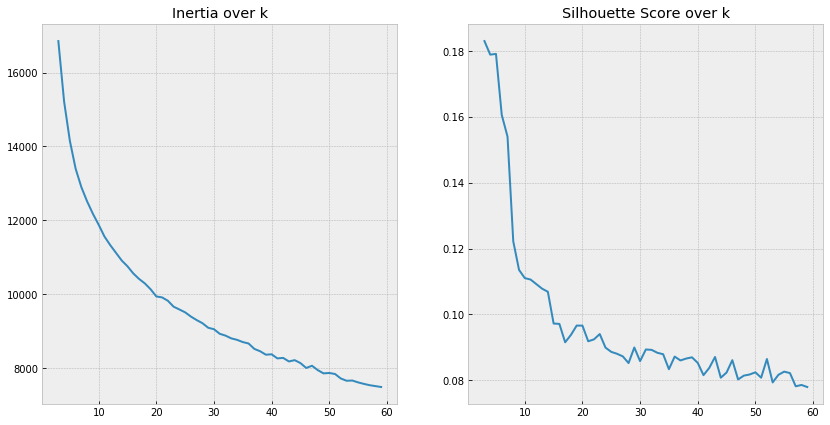

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(scores_df.k, scores_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(scores_df.k, scores_df.silhouette);
axes[1].set_title('Silhouette Score over k')

It appears that the optimum score appears at k = 60, inertia = 7056, silhouette = 0.087. Aftering about 60 the score begins to osolate in a downward trend the higher the k gets. So i've decided to search each value of k between 3 and 60.

In [17]:
scores_df.sort_values(by='silhouette', ascending=False).head(25)

,k,inertia,silhouette
0,3,16850.123864,0.183074
2,5,14152.268762,0.179176
1,4,15214.195275,0.178951
3,6,13399.301582,0.160627
4,7,12897.610760,0.154046
5,8,12512.437724,0.122167
6,9,12179.299107,0.113510
7,10,11883.194319,0.111010
8,11,11565.814544,0.110580
9,12,11334.734419,0.109187


k's of 18, 19, & 20 has the optimum scores between the silhouette score and the inertia.

## DBSCAN

In [18]:
dbscan = DBSCAN(eps=1.9, min_samples=3)
dbscan.fit(X_scaled);

In [19]:
set(dbscan.labels_)

{-1, 0}

In [20]:
silhouette_score(X_scaled, dbscan.labels_)

-0.0476637868534624